In [ ]:
#download data set from kaggle for predicting house prices

In [ ]:
#import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns = None                    #ensures we see all columns for better data understanding
pd.options.display.max_rows = None

In [ ]:
#read data in pandas

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.shape

(1460, 81)

In [ ]:
#begin feature engineering/clean up
#1 treat null/missing values

In [5]:
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [ ]:
#drop columns with execessive null values

In [6]:
train.drop(['MiscFeature','Fence','PoolQC','Alley'],axis=1,inplace=True)
train.drop(['FireplaceQu'],axis=1,inplace=True)
train.drop(['Id'],axis=1,inplace=True)

In [ ]:
#drop rows multiple columns are null/missing

In [7]:
train=train[train['GarageType'].notnull()]

In [ ]:
#interim check on how data looks like after null treatment

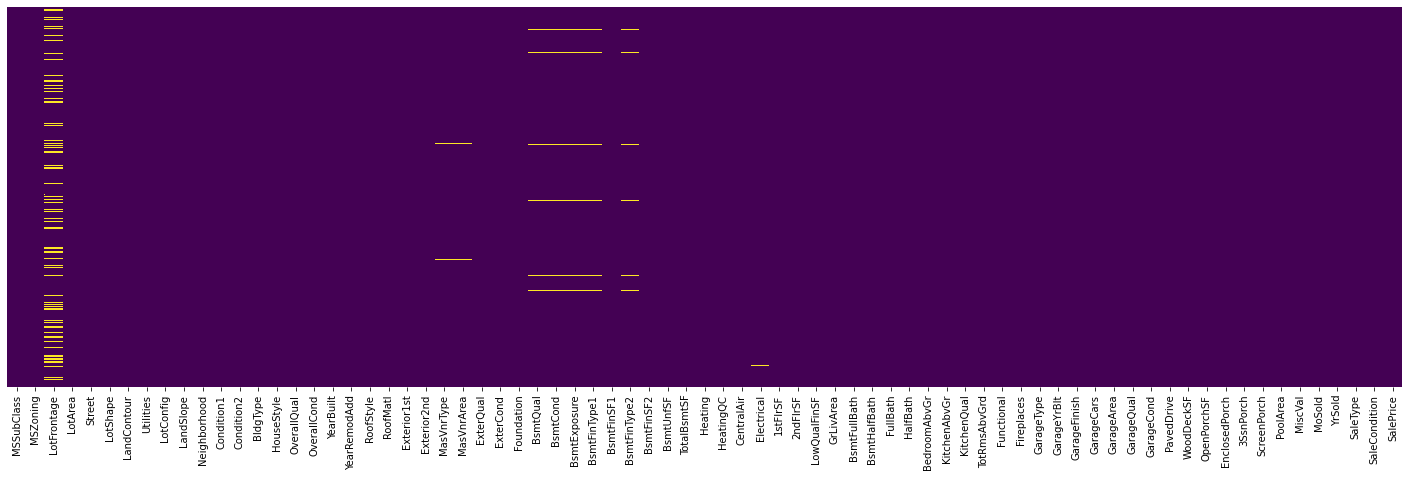

In [8]:
plt.figure(figsize=(25, 7))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
#replace numeric null values with mean and non numeric null values with mode

In [9]:
train['LotFrontage'].fillna(train['LotFrontage'].mean(),inplace=True)

train['Functional'].fillna(train['Functional'].mode()[0],inplace=True)

train['MasVnrArea'].fillna(0,inplace=True)
train['MasVnrType'].fillna(train['MasVnrType'].mode()[0],inplace=True)

train['BsmtQual'].fillna(train['BsmtQual'].mode()[0],inplace=True)

train['BsmtCond'].fillna(train['BsmtCond'].mode()[0],inplace=True)

train['BsmtExposure'].fillna(train['BsmtExposure'].mode()[0],inplace=True)

train['BsmtFinType1'].fillna(train['BsmtFinType1'].mode()[0],inplace=True)

train['BsmtFinType2'].fillna(train['BsmtFinType2'].mode()[0],inplace=True)

train['Electrical'].fillna(train['Electrical'].mode()[0],inplace=True)

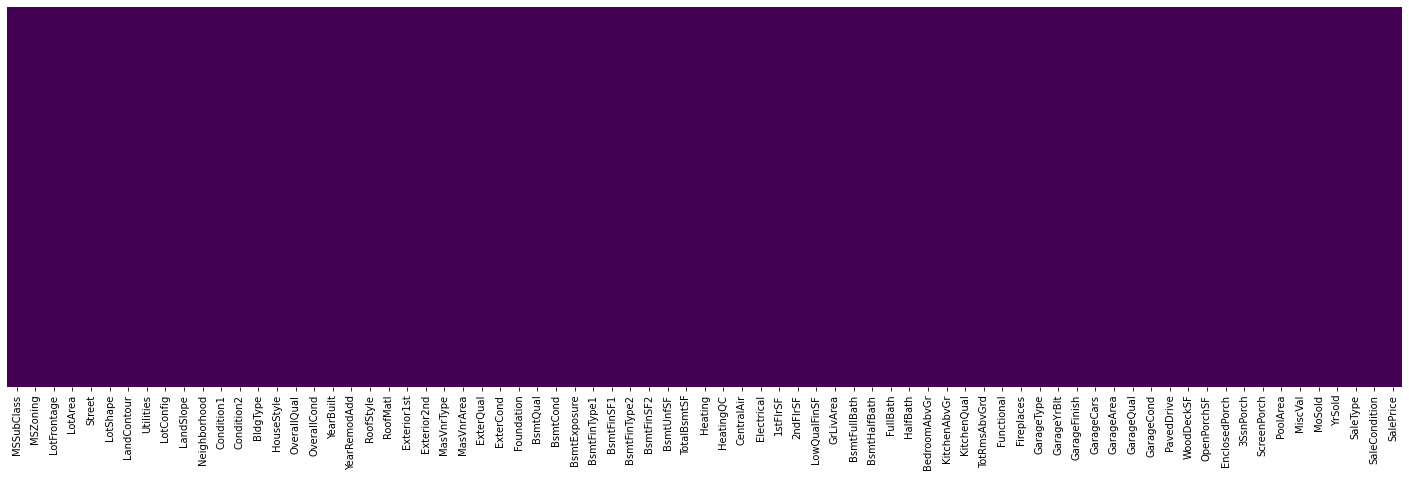

In [10]:
#check data after null treatment so that no null value exist
plt.figure(figsize=(25, 7))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
#2 encode string columns
#function to encode category variables

In [11]:
def encode_category(cols):
    encodedtraindf=train
    for col in cols:
        #print(col)
        df1=pd.get_dummies(train[col],prefix=col,drop_first=True)
        encodedtraindf = pd.concat([encodedtraindf,df1],axis=1)
        encodedtraindf.drop(col,axis=1,inplace=True)
    return encodedtraindf

In [12]:
#get list of all columns with datatype object assuming all object types are categories, other test columns can be removed or analysed in details
columns= train.select_dtypes(['object']).columns

encodedtraindf=encode_category(columns)
#encodetraindf

In [13]:
encodedtraindf.shape

(1379, 231)

In [ ]:
encodedtraindf.head(5)

In [ ]:
#split dataset into test and training data, actual test dataset from kaggle should be used for validation

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(encodedtraindf.drop('SalePrice',axis=1), 
                                                    encodedtraindf['SalePrice'], test_size=0.30, 
                                                    random_state=101)

In [ ]:
#import model from sklearn

In [15]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

In [ ]:
#create instance and fit the model

In [16]:
#logmodel = LogisticRegression()
#logmodel = Lasso()
logmodel=LinearRegression()
logmodel.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#get prediction from our model

In [17]:
predictions = logmodel.predict(X_test)

In [ ]:
#some checks on how good is our model

In [18]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 19602.265108135438
MSE: 2520646279.7023196
RMSE: 50206.038279297834


In [19]:
train['SalePrice'].describe()

count      1379.00000
mean     185479.51124
std       79023.89060
min       35311.00000
25%      134000.00000
50%      167500.00000
75%      217750.00000
max      755000.00000
Name: SalePrice, dtype: float64

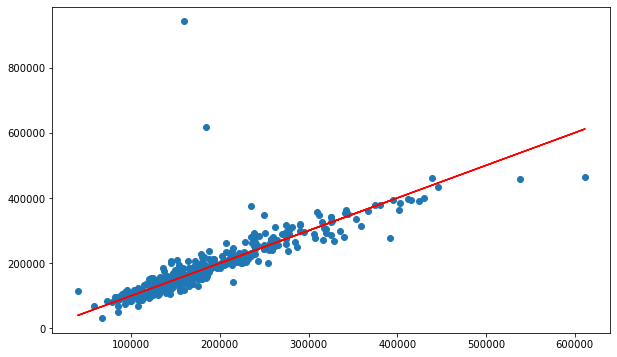

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

In [ ]:
result=test
result.drop(['MiscFeature','Fence','PoolQC','Alley'],axis=1,inplace=True)
result.drop(['FireplaceQu'],axis=1,inplace=True)

In [ ]:
plt.figure(figsize=(25, 7))
sns.heatmap(result.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
result['LotFrontage'].fillna(result['LotFrontage'].mean(),inplace=True)
result['MasVnrArea'].fillna(0,inplace=True)
result['MasVnrType'].fillna(result['MasVnrType'].mode()[0],inplace=True)

In [ ]:
result['BsmtQual'].fillna(result['BsmtQual'].mode()[0],inplace=True)

result['BsmtCond'].fillna(result['BsmtCond'].mode()[0],inplace=True)

result['BsmtExposure'].fillna(result['BsmtExposure'].mode()[0],inplace=True)

result['BsmtFinType1'].fillna(result['BsmtFinType1'].mode()[0],inplace=True)

result['BsmtFinType2'].fillna(result['BsmtFinType2'].mode()[0],inplace=True)

In [ ]:
result['GarageType'].fillna(result['GarageType'].mode()[0],inplace=True)
result['GarageYrBlt'].fillna(result['GarageYrBlt'].mode()[0],inplace=True)
result['GarageFinish'].fillna(result['GarageFinish'].mode()[0],inplace=True)
result['GarageQual'].fillna(result['GarageQual'].mode()[0],inplace=True)
result['GarageCond'].fillna(result['GarageCond'].mode()[0],inplace=True)

In [ ]:
result['MSZoning'].fillna(result['MSZoning'].mode()[0],inplace=True)
result['Utilities'].fillna(result['Utilities'].mode()[0],inplace=True)

In [ ]:
def encode_category(cols):
    encodetestdf=result
    for col in cols:
        #print(col)
        df1=pd.get_dummies(result[col],prefix=col,drop_first=True)
        encodetestdf = pd.concat([encodetestdf,df1],axis=1)
    return encodetestdf

In [ ]:
columns= result.select_dtypes(['object']).columns
encodetestdf=encode_category(columns)

In [ ]:
finaltest=encodetestdf[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','ExterQual_TA','FullBath','TotRmsAbvGrd','KitchenQual_TA','YearBuilt','YearRemodAdd','BsmtQual_TA','Foundation_PConc','GarageYrBlt','GarageFinish_Unf','MasVnrArea','Fireplaces','ExterQual_Gd','GarageType_Detchd','Neighborhood_NridgHt','BsmtFinType1_GLQ','BsmtFinSF1','SaleType_New','Foundation_CBlock','SaleCondition_Partial','MasVnrType_None','OpenPorchSF','Neighborhood_NoRidge','LotFrontage','HeatingQC_TA','MasVnrType_Stone','BsmtExposure_No','BsmtExposure_Gd','2ndFlrSF','WoodDeckSF','Exterior2nd_VinylSd','Exterior1st_VinylSd','KitchenQual_Gd']]

In [ ]:
finaltest['GarageCars'].fillna(finaltest['GarageCars'].mode()[0],inplace=True)
finaltest['GarageArea'].fillna(finaltest['GarageArea'].mode()[0],inplace=True)
finaltest['TotalBsmtSF'].fillna(finaltest['TotalBsmtSF'].mean(),inplace=True)
finaltest['BsmtFinSF1'].fillna(finaltest['BsmtFinSF1'].mean(),inplace=True)
#finaltest.astype({'GarageCars': 'int64'}).dtypes
finaltest=finaltest.astype({'BsmtFinSF1': 'int64','TotalBsmtSF': 'int64','GarageArea': 'int64','GarageCars': 'int64'})
#finaltest.astype({'TotalBsmtSF': 'int64'}).dtypes
#finaltest.astype({'BsmtFinSF1': 'int64'}).dtypes

In [ ]:
testpredictions = logmodel.predict(finaltest)

In [ ]:
FinalPred=pd.DataFrame(testpredictions)

In [ ]:
FinalPred.to_csv('predictions.csv')

In [ ]:
frames=[encodetestdf['Id'],FinalPred]
sample_submission=pd.concat(frames,axis=1)

In [ ]:
sample_submission.to_csv('sample_submission.csv')